In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4'] # CM 단위 키
weight = brfss['WTKG3'] # KG 단위 체중 

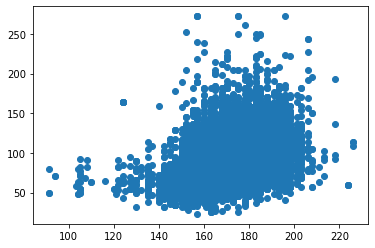

In [3]:
plt.scatter(height , weight)
plt.show()

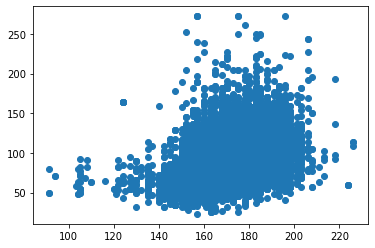

In [4]:
# scatter plot은 구현 속도가 상대적으로 떨어짐 
# plot과 marker를 이용해 빠르게 구현 

plt.plot(height, weight, 'o')
plt.show()

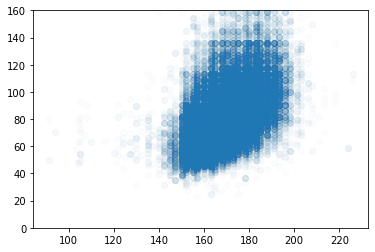

In [5]:
# alpha 투명도
plt.plot(height, weight, 'o' , alpha = 0.02)
plt.ylim(0,160)
plt.show()

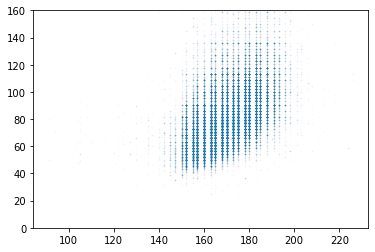

In [6]:
# makersize  산점도 포화 정도 
plt.plot(height, weight, 'o' , alpha = 0.02, markersize = 1)
plt.ylim(0,160)
plt.show()

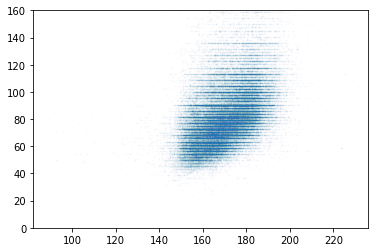

In [7]:
# "Jittering" is adding a bit of random noise to scatterplots, to better see the information contained in the data
#,usually when there is a lot of overplotting.

#  jittering - > 노이즈 생성 평균0 , 표준편차 2 
# 열이 사라졌지만 체중을 반올림한 행이 있다.
height_jitter = height + np.random.normal(0,2 , size = len(brfss))
plt.plot(height_jitter, weight, 'o', markersize = 1, alpha = 0.02)
plt.ylim(0,160)
plt.show()

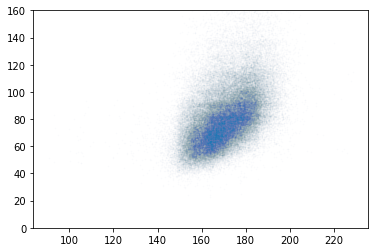

In [8]:
# More jittering 
height_jitter = height + np.random.normal(0,2 , size = len(brfss))
weight_jitter = weight + np.random.normal(0,2 , size = len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = 0.01)
plt.ylim(0,160)
plt.show()

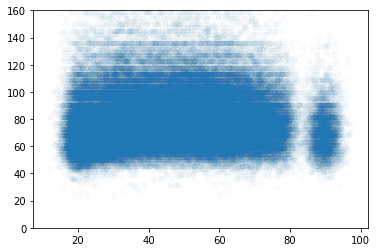

In [9]:
# weight and age
age = brfss['AGE'] + np.random.normal(0,2.5, size  = len(brfss) ) 
weight = brfss['WTKG3']
plt.plot(age, weight , 'o', markersize  = 5,  alpha = 0.02)
plt.ylim(0,160)
plt.show()

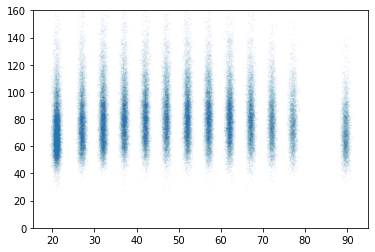

In [10]:
age = brfss['AGE'] + np.random.normal(0,0.5, size  = len(brfss) ) 
weight = brfss['WTKG3'] + np.random.normal(0,2, size  = len(brfss) ) 
plt.plot(age, weight , 'o', markersize  = 1,  alpha = 0.02)
plt.ylim(0,160)
plt.show()

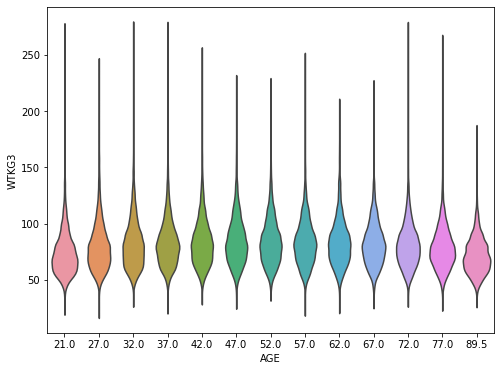

In [11]:
# violin plot 
# 체중 분포 
d =  brfss.dropna(subset = ['AGE','WTKG3'])

fig, ax = plt.subplots(figsize = (8,6))

sns.violinplot(x = 'AGE', y = 'WTKG3', data = d, inner = None ,ax = ax )  # Using None will draw unadorned violins.
plt.show()

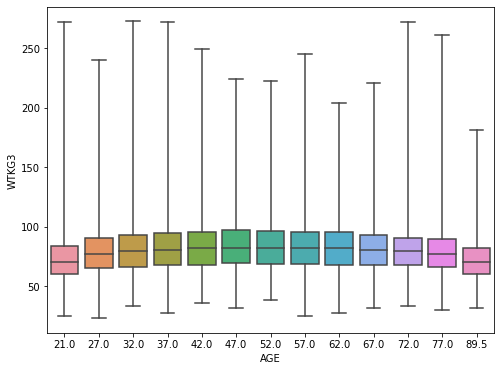

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = 'AGE', y = 'WTKG3', data = d, whis = 10, ax = ax)   # 가상의 선을 어떻게 그을 것인가에 대한 값

plt.show()

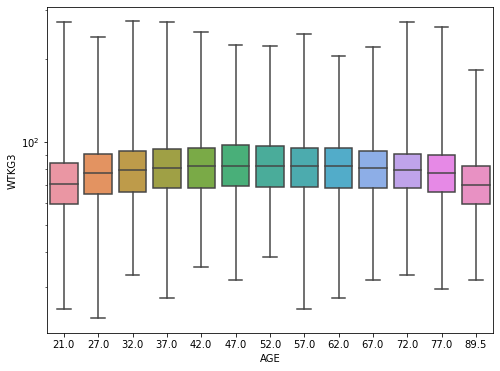

In [13]:
# 높은 값으로 치우친 데이터의 경우 로그 스케일로 보는것이 유용 

fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = 'AGE', y = 'WTKG3', data = d, whis = 10, ax = ax)   # 가상의 선을 어떻게 그을 것인가에 대한 값

plt.yscale('log')
plt.show()

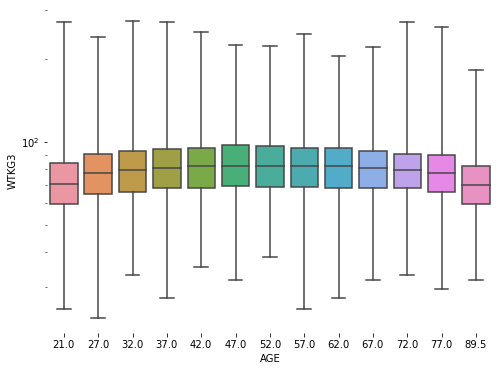

In [14]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = 'AGE', y = 'WTKG3', data = d, whis = 10, ax = ax)   
plt.yscale('log')
sns.despine(left=True, bottom=True) # Remove the top and right spines from plot
plt.show()

In [15]:
# 상관관계 
# 통계에서 일반적은 Pearson 상관계수 의미 , -1 ~ 1사이 변수 간 선형관계의 강도를 정량화
# 관계가 비선형인 경우 상관관계는 과소평가 
col  = ["HTM4", "WTKG3", "AGE"]
s = brfss[col]

In [16]:
# 상관행렬 
s.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


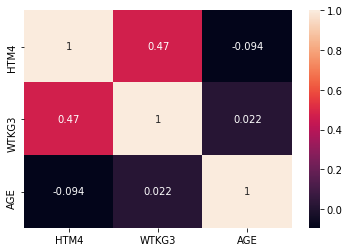

In [17]:
sns.heatmap(s.corr() , annot = True)
plt.show()

In [18]:
# 선의 기울기 파악 
from scipy.stats import linregress 

In [19]:
# linregress 는 NaN을 처리할 수 없으므로 NaN 미리제거 필요 
s = brfss.dropna(subset = ["WTKG3","HTM4"])

In [20]:
xs = s["HTM4"] # 독립변수
ys = s["WTKG3"] # 종속변수 
r = linregress(xs, ys)
r   # slope 기울기, intercept 절편 , rvalue 설명력,  p값 ,  표준편차

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)

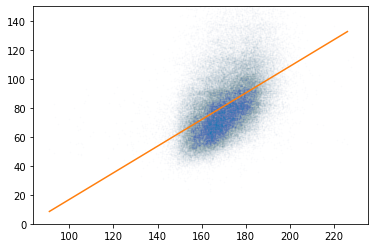

In [21]:
# Regression lines
fx = np.array([xs.min(), xs.max()])
fy = r.intercept + r.slope  * fx
plt.plot(height_jitter, weight_jitter, 'o', markersize = 1, alpha = 0.01)
plt.plot(fx, fy, '-')
plt.ylim(0,150)
plt.show()

In [23]:
# Multiple regresssion
import statsmodels.formula.api as smf 

results = smf.ols('INCOME2 ~ _VEGESU1', data = brfss ).fit() # Ordinary Least Squares(ols)는 보통최소제곱 
results.params # 기울기와 절편을 포함한 값 출력  

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

In [24]:
# 분석에 대한 요약 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                INCOME2   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1096.
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          1.38e-238
Time:                        19:53:27   Log-Likelihood:            -1.6629e+05
No. Observations:               75426   AIC:                         3.326e+05
Df Residuals:                   75424   BIC:                         3.326e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4507      0.014    378.233      0.000       5.422       5.479
_VEGESU1       0.2049      0.006     33.103      0.000       0.193       0.217
==============================================================================
Omnibus:                     7851.406   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8173.326
Skew:                          -0.754   Prob(JB):                         0.00
Kurtosis:                       2.427   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
gss = pd.read_hdf('gss.hdf5', 'gss' )
r = smf.ols('realinc ~  educ', data = gss).fit()
r.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64